# Imports

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, svm, tree, metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas import DataFrame
from pathlib import Path
import collections
import numpy as np
import subprocess
import itertools
import os.path
import random
import time
import json
import sys
import re




# Converts C operators into natural language equivalent
                            (naive approach)

In [22]:
def naive_word_conversion(code_string):
    
    code_string = re.sub('\>\>=', ' is reassigned after shifting right by ', code_string)
    code_string = re.sub('\<\<=', ' is reassigned after shifting left by ', code_string)
    code_string = re.sub('\<\<', ' is shifted left by ', code_string)
    code_string = re.sub('\>\>', ' is shifted right by ' , code_string)
    code_string = re.sub('\<=', ' is less than or equal to ', code_string)
    code_string = re.sub('\>=', ' is greater than or equal to ', code_string)
    code_string = re.sub('-\>', ' is dereferenced and retrieves ', code_string)
    code_string = re.sub('\<', ' is less than ', code_string)
    code_string = re.sub('\>', ' is greater than ', code_string)
    code_string = re.sub('\+\+' ,' is incremented by one ' , code_string)
    code_string = re.sub('--', ' is decremented by one ', code_string)
    code_string = re.sub('\+=', ' is reassinged after adding ' , code_string)
    code_string = re.sub('\-=', ' is reassigned after subtracting ', code_string)
    code_string = re.sub('\*=', ' is reassigned after multiplying by ', code_string)
    code_string = re.sub('\/=', ' is reassigned after dividing by ', code_string)
    code_string = re.sub('\%=', ' is reassigned after moding by ', code_string)
    code_string = re.sub('&=', ' is reassigned after a bitwise AND of ', code_string)
    code_string = re.sub('\|=', ' is reassigned after a bitwise inclusive OR of ', code_string)
    code_string = re.sub('\^=', ' is reassigned after a bitwise exclusive OR of ', code_string)
    code_string = re.sub('==', ' is equal to ', code_string)
    code_string = re.sub('\!=', ' is not equal to ', code_string)
    code_string = re.sub('&&', ' and ', code_string)
    code_string = re.sub('\|\|', ' or ', code_string)
    code_string = re.sub('\?', ' is true then ', code_string)
    code_string = re.sub('\:', ' else is false then ', code_string)
    code_string = re.sub('\/\/', '  ', code_string)
    code_string = re.sub('=', ' equals ', code_string)
    code_string = re.sub('\.', ' uses ', code_string)
    code_string = re.sub(' -{1} ', ' is subtracted from ', code_string)
    code_string = re.sub('\+{1}', ' is added to ', code_string)
    code_string = re.sub('\/\*([^\*]|(\*+([^\*\/])))*\*\/', ' ', code_string)  
    code_string = re.sub('\*{1}', ' is multiplied by ', code_string)
    code_string = re.sub('&{1}', ' has an AND done with ', code_string)
    code_string = re.sub('\/{1}', ' is divided by ', code_string)
    code_string = re.sub('\%{1}', ' is moded by ', code_string)
    code_string = re.sub('\!{1}', ' is negated ', code_string)
    code_string = re.sub('\|{1}', ' has an OR done with ', code_string)
    code_string = re.sub('\^{1}', ' has an X OR done with ', code_string)
    code_string = re.sub('\(', ' open parenthesis ', code_string)
    code_string = re.sub('\)', ' close parenthesis ', code_string)
    code_string = re.sub('\[', ' open bracket ', code_string)
    code_string = re.sub('\]', ' close bracket ', code_string)
    code_string = re.sub('\#', ' ', code_string)
    code_string = re.sub(';', ' . ', code_string)
    
    
    return code_string

# Load data set into script

In [23]:
with open('input_data.json') as data:
    jdata = json.load(data)

# If you want to test your reg exp function

In [24]:

# Submission number 16 has a multiline comment and some single line comments so you can play with it
#a_code = next(iter(jdata[0]['Submissions'][< SUBMISSION NUMBER HERE >].values()))['Code'][0]
a_code = next(iter(jdata[0]['Submissions'][16].values()))['Code'][0]

print('\n---\nBefore:\n')

print(a_code)

print('\n---\nAfter:\n')
print(naive_word_conversion(a_code))


---
Before:

#include"stdio.h"
#include"string.h"
#include"math.h"
#include"stdlib.h"
#include"ctype.h"
#include"limits.h"
#include"time.h"
#include"stdbool.h"
#define ll long long

/*
int qualitysort(const void *a, const void *b)
{
	if(*(ll *)a > *(ll *)b)
	return 1;
	if(*(ll *)a < *(ll *)b)
	return -1;
	return 0;
}
*/

int main()
{
	clock_t lnh=clock();
	ll n,c=0,i,j,l,o;
	//scanf("%lld",&n);
	
	char a[105];
	scanf("%s",a);
	
	//for(i=0;i<n;scanf("%lld",&a[i++]));
	//qsort(a,n,sizeof(ll),qualitysort);
	for(i=l=o=0;i<strlen(a);i++)
	{
		if(a[i]=='o')
		o++;
		else
		l++;
	}
	if(!o)
	printf("YES");
	else
	{
		if(l%o==0)
		printf("YES");
		else
		printf("NO");
	}
	
	printf("\n");
	
	clock_t cls=clock();
	//printf("Execution Time: %fms\n",(double)((cls-lnh)*1000)/CLOCKS_PER_SEC);
	
	return 0;
}

---
After:

 include"stdio uses h"
 include"string uses h"
 include"math uses h"
 include"stdlib uses h"
 include"ctype uses h"
 include"limits uses h"
 include"time uses h"
 include"stdbool use

# Extract data Naively

In [58]:
rows = []
index = []
for problem in jdata:
    for submissions in problem['Submissions']:
        for submission in submissions:
            code = submissions[submission]['Code'][0]
            code = naive_word_conversion(code)
            rows.append({'code':code, 'label':str(problem['contestId'])+problem['index']})
            index.append(submission)

naive_data = DataFrame(rows, index=index)
test = rows[198]['code']
print(test)

 pragma GCC optimize  open parenthesis "Ofast" close parenthesis 

 include  is less than stdio uses h is greater than 
 include  is less than string uses h is greater than 

 define INT_MAX				 99999999
 define INT_MIN				-99999999
 define SUCCESS				0
 define FAIL				-1
 define MAX_DIM				200005


long long n, m . 
  long long room_len open bracket MAX_DIM close bracket  . 
long long room_seq open bracket MAX_DIM close bracket  . 

  static to get inlined
static void test_wrapper open parenthesis  close parenthesis 
{
	int test_cases, T . 
	int i, j, id . 
	char str open bracket 105 close bracket  . 
	int min . 
	long long room_cnt, room_len . 
	long long dorm_cnt . 

 ifdef WINDOWS_TEST
	 
	scanf open parenthesis " is moded by d",  has an AND done with T close parenthesis  . 
	for  open parenthesis test_cases  equals  1 .  test_cases  is less than or equal to  T .  test_cases is incremented by one  close parenthesis 
 endif
	{
		 
		scanf open parenthesis " is moded by d  is moded b

# Split data set into a validation set, training set and testing set
                                    (Naive approach)

In [55]:
# Create separate validation data from training and testing data
seed = 56
sub_data, naive_validate_data = train_test_split(naive_data,test_size=0.20, random_state=seed)

#print(sub_data)
#token_pattern='-\d*|\w\w+'
# Create bag of words with all of the data not part of the validation set
naive_vectorizer = CountVectorizer(token_pattern='-\d*|\w\w+')
naive_BoW = naive_vectorizer.fit_transform(sub_data['code'].values)
display(naive_vectorizer.vocabulary_)
targets_naive = sub_data['label'].values

# create traing and testing data
seed = 42
data_train, data_test = train_test_split(sub_data,test_size=0.20, random_state=seed)
x_train_naive = naive_vectorizer.transform(data_train['code'].values)
y_train_naive = data_train['label'].values
x_test_naive = naive_vectorizer.transform(data_test['code'].values)
y_test_naive = data_test['label'].values

{'include': 1572,
 'stdio': 2512,
 'int': 1606,
 'main': 1818,
 'char': 951,
 'ch': 946,
 '100': 37,
 'scanf': 2383,
 'for': 1410,
 'if': 1553,
 'else': 1285,
 'printf': 2231,
 'math': 1831,
 'diff': 1207,
 'res': 2321,
 'res1': 2322,
 'res2': 2323,
 'abs': 682,
 '-': 0,
 'stdlib': 2513,
 '200000': 251,
 'sum': 2551,
 'long': 1795,
 'double': 1243,
 'temp': 2615,
 'return': 2339,
 'set': 2412,
 'many': 1823,
 'funcs': 1435,
 'template': 2623,
 'string': 2535,
 'stdbool': 2507,
 'time': 2656,
 'define': 1180,
 'inf': 1587,
 '1072114514': 105,
 'llinf': 1768,
 '4154118101919364364': 408,
 'mod': 1931,
 '1000000007': 49,
 'pi': 2156,
 '1415926535897932384': 170,
 'max': 1833,
 'min': 1895,
 'zt': 2873,
 'round': 2360,
 'ceil': 937,
 'gcd': 1448,
 'while': 2795,
 'lcm': 1713,
 'ncr': 1980,
 'fact': 1349,
 'pow': 2194,
 'llmax': 1770,
 'llmin': 1771,
 'llzt': 1779,
 'llround': 1775,
 'llceil': 1762,
 'llgcd': 1766,
 'lllcm': 1769,
 'llncr': 1772,
 'llfact': 1765,
 'llpow': 1774,
 'dbmax': 1

# Create Machine Learning algorithms

In [56]:

svm_classifier_naive = svm.SVC(kernel='linear',class_weight='balanced')


dt_classifier_naive = tree.DecisionTreeClassifier(class_weight='balanced')


rf_classifier_naive = RandomForestClassifier(n_estimators=10,class_weight='balanced')


nn_classifier_naive = MLPClassifier(hidden_layer_sizes=(100,70),max_iter=500)


# Cross validate for each classifier

                                       naive approach: uses everything

In [57]:
print('Random chance score: ' + str(1/len(set(targets_naive))))
svm_scores = cross_val_score(svm_classifier_naive, naive_BoW, targets_naive, cv=5)
print('SVM scores: ' + str(svm_scores))
print('SVM scores average:' + str(sum(svm_scores)/5))

dt_scores = cross_val_score(dt_classifier_naive, naive_BoW, targets_naive, cv=5)
print('DT scores:  ' + str(dt_scores))
print('DT scores average:' + str(sum(dt_scores)/5))

rf_scores = cross_val_score(rf_classifier_naive, naive_BoW, targets_naive, cv=5)
print('RF scores:  ' + str(rf_scores))
print('RF scores average:' + str(sum(rf_scores)/5))

nn_scores = cross_val_score(nn_classifier_naive, naive_BoW, targets_naive, cv=5)
print('NN scores:  ' + str(nn_scores))
print('NN scores average:' + str(sum(nn_scores)/5))

Random chance score: 0.019230769230769232
SVM scores: [0.77223089 0.74603175 0.74878444 0.73278689 0.75787728]
SVM scores average:0.7515422483242689
DT scores:  [0.7425897  0.74761905 0.76823339 0.73114754 0.73797678]
DT scores average:0.7455132924603769
RF scores:  [0.7550702  0.71904762 0.75850891 0.72786885 0.71641791]
RF scores average:0.735382699772599
NN scores:  [0.76443058 0.73015873 0.7649919  0.72459016 0.74792703]
NN scores average:0.7464196798195303


# Mean Accuracy of each classifier

                                       naive approach: uses everything

In [45]:
print("Accuracy of SVM (linear): %0.2f (+/- %0.3f)" % (svm_scores.mean(), svm_scores.std() * 2))
print("Accuracy of Decision Tree: %0.2f (+/- %0.3f)" % (dt_scores.mean(), dt_scores.std() * 2))
print("Accuracy of Random Forest: %0.2f (+/- %0.3f)" % (rf_scores.mean(), rf_scores.std() * 2))
print("Accuracy of Neural Network: %0.2f (+/- %0.3f)" % (nn_scores.mean(), nn_scores.std() * 2))

Accuracy of SVM (linear): 0.86 (+/- 0.028)
Accuracy of Decision Tree: 0.86 (+/- 0.025)
Accuracy of Random Forest: 0.85 (+/- 0.011)
Accuracy of Neural Network: 0.85 (+/- 0.025)


# Train classifiers using Training data

                                       naive approach: uses everything

In [46]:
svm_classifier_naive.fit(x_train_naive,y_train_naive)
dt_classifier_naive.fit(x_train_naive,y_train_naive)
rf_classifier_naive.fit(x_train_naive,y_train_naive)
nn_classifier_naive.fit(x_train_naive,y_train_naive)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 70), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# Get scores for the classifiers using test data

                                       naive approach: uses everything

In [47]:
score = svm_classifier_naive.score(x_test_naive, y_test_naive)
print('SVM score: ' + str(score))
score = dt_classifier_naive.score(x_test_naive, y_test_naive)
print('DT score: ' + str(score))
score = rf_classifier_naive.score(x_test_naive, y_test_naive)
print('RF score: ' + str(score))
score = nn_classifier_naive.score(x_test_naive, y_test_naive)
print('NN score: ' + str(score))

SVM score: 0.8888888888888888
DT score: 0.8615136876006442
RF score: 0.8405797101449275
NN score: 0.8357487922705314


# Create bag of words for validate data

In [48]:
x_validate_naive = naive_vectorizer.transform(naive_validate_data['code'].values)
y_validate_naive = naive_validate_data['label'].values

# Get scores for the classifiers using validation data

                                       naive approach: uses everything

In [49]:
score = svm_classifier_naive.score(x_validate_naive, y_validate_naive)
print('SVM score: ' + str(score))
score = dt_classifier_naive.score(x_validate_naive, y_validate_naive)
print('DT score: ' + str(score))
score = rf_classifier_naive.score(x_validate_naive, y_validate_naive)
print('RF score: ' + str(score))
score = nn_classifier_naive.score(x_validate_naive, y_validate_naive)
print('NN score: ' + str(score))

SVM score: 0.8762886597938144
DT score: 0.8672680412371134
RF score: 0.8569587628865979
NN score: 0.8492268041237113


# Create confusion matrix for each classifier

                                       naive approach: uses everything

In [50]:
svm_y_pred_naive = svm_classifier_naive.predict(x_validate_naive)
display(metrics.confusion_matrix(y_validate_naive, svm_y_pred_naive))
precision, recall, fbeta_score, support = metrics.precision_recall_fscore_support(y_validate_naive, svm_y_pred_naive)
print('precision: ' + str(precision))
print()
print('avg precision: ' + str(sum(precision)/len(precision)))
print()
print('recall: ' + str(recall))
print()
print('avg recall: ' + str(sum(recall)/len(recall)))
print()
print('fbeta_score' + str(fbeta_score))
print()
print('avg fbeta_score: ' + str(sum(fbeta_score)/len(fbeta_score)))
print()
dt_y_pred_naive = dt_classifier_naive.predict(x_validate_naive)
metrics.confusion_matrix(y_validate_naive, dt_y_pred_naive)
precision, recall, fbeta_score, support = metrics.precision_recall_fscore_support(y_validate_naive, dt_y_pred_naive)
print('precision: ' + str(precision))
print()
print('avg precision: ' + str(sum(precision)/len(precision)))
print()
print('recall: ' + str(recall))
print()
print('avg recall: ' + str(sum(recall)/len(recall)))
print()
print('fbeta_score' + str(fbeta_score))
print()
print('avg fbeta_score: ' + str(sum(fbeta_score)/len(fbeta_score)))
print()
rf_y_pred_naive = rf_classifier_naive.predict(x_validate_naive)
metrics.confusion_matrix(y_validate_naive, rf_y_pred_naive)
precision, recall, fbeta_score, support = metrics.precision_recall_fscore_support(y_validate_naive, rf_y_pred_naive)
print('precision: ' + str(precision))
print()
print('avg precision: ' + str(sum(precision)/len(precision)))
print()
print('recall: ' + str(recall))
print()
print('avg recall: ' + str(sum(recall)/len(recall)))
print()
print('fbeta_score' + str(fbeta_score))
print()
print('avg fbeta_score: ' + str(sum(fbeta_score)/len(fbeta_score)))
print()
nn_y_pred_naive = nn_classifier_naive.predict(x_validate_naive)
metrics.confusion_matrix(y_validate_naive, nn_y_pred_naive)
precision, recall, fbeta_score, support = metrics.precision_recall_fscore_support(y_validate_naive, nn_y_pred_naive)
print('precision: ' + str(precision))
print()
print('avg precision: ' + str(sum(precision)/len(precision)))
print()
print('recall: ' + str(recall))
print()
print('avg recall: ' + str(sum(recall)/len(recall)))
print()
print('fbeta_score' + str(fbeta_score))
print()
print('avg fbeta_score: ' + str(sum(fbeta_score)/len(fbeta_score)))
print()

array([[ 4,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0, 23,  0],
       [ 0,  0,  0, ...,  0,  0, 21]])

precision: [1.         0.33333333 0.28571429 0.93103448 0.88888889 1.
 0.75       0.57142857 0.90909091 1.         0.72727273 1.
 0.76470588 1.         0.88235294 1.         0.96       0.92307692
 0.5        0.75       0.66666667 0.79310345 0.85714286 0.75
 0.81818182 0.86206897 0.92857143 1.         1.         0.85185185
 0.5        0.94444444 0.875      1.         0.73333333 0.84210526
 0.5        0.89285714 0.6        1.         1.         1.
 1.         0.90909091 1.         1.         0.78571429 0.88888889
 0.54545455 0.83333333 1.         1.        ]

avg precision: 0.8375905409149264

recall: [1.         0.2        0.66666667 0.81818182 1.         0.90909091
 1.         0.8        0.90909091 1.         0.69565217 1.
 0.86666667 0.5        0.9375     0.58823529 0.96       0.85714286
 0.44444444 0.75       0.8        0.95833333 0.85714286 1.
 0.9        0.86206897 0.92857143 1.         0.4        0.79310345
 0.4        0.94444444 1.         1.         0.91666667 0.88888889
 1.    

/home/hraval/.conda/envs/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(40,40))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.2        0.         ... 0.         0.         0.        ]
 [0.         0.         0.66666667 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.71428571 0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.95238095]]
Normalized confusion matrix
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.8        0.         ... 0.         0.         0.        ]
 [0.         0.         0.66666667 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.85714286 0.         0.        ]
 [0.         0.         0.         ... 0.         0.82608696 0.        ]
 [0.         0.         0.         ... 0.         0.         0.85714286]]
Normalized confusion matrix
[[1.         0.         0.  

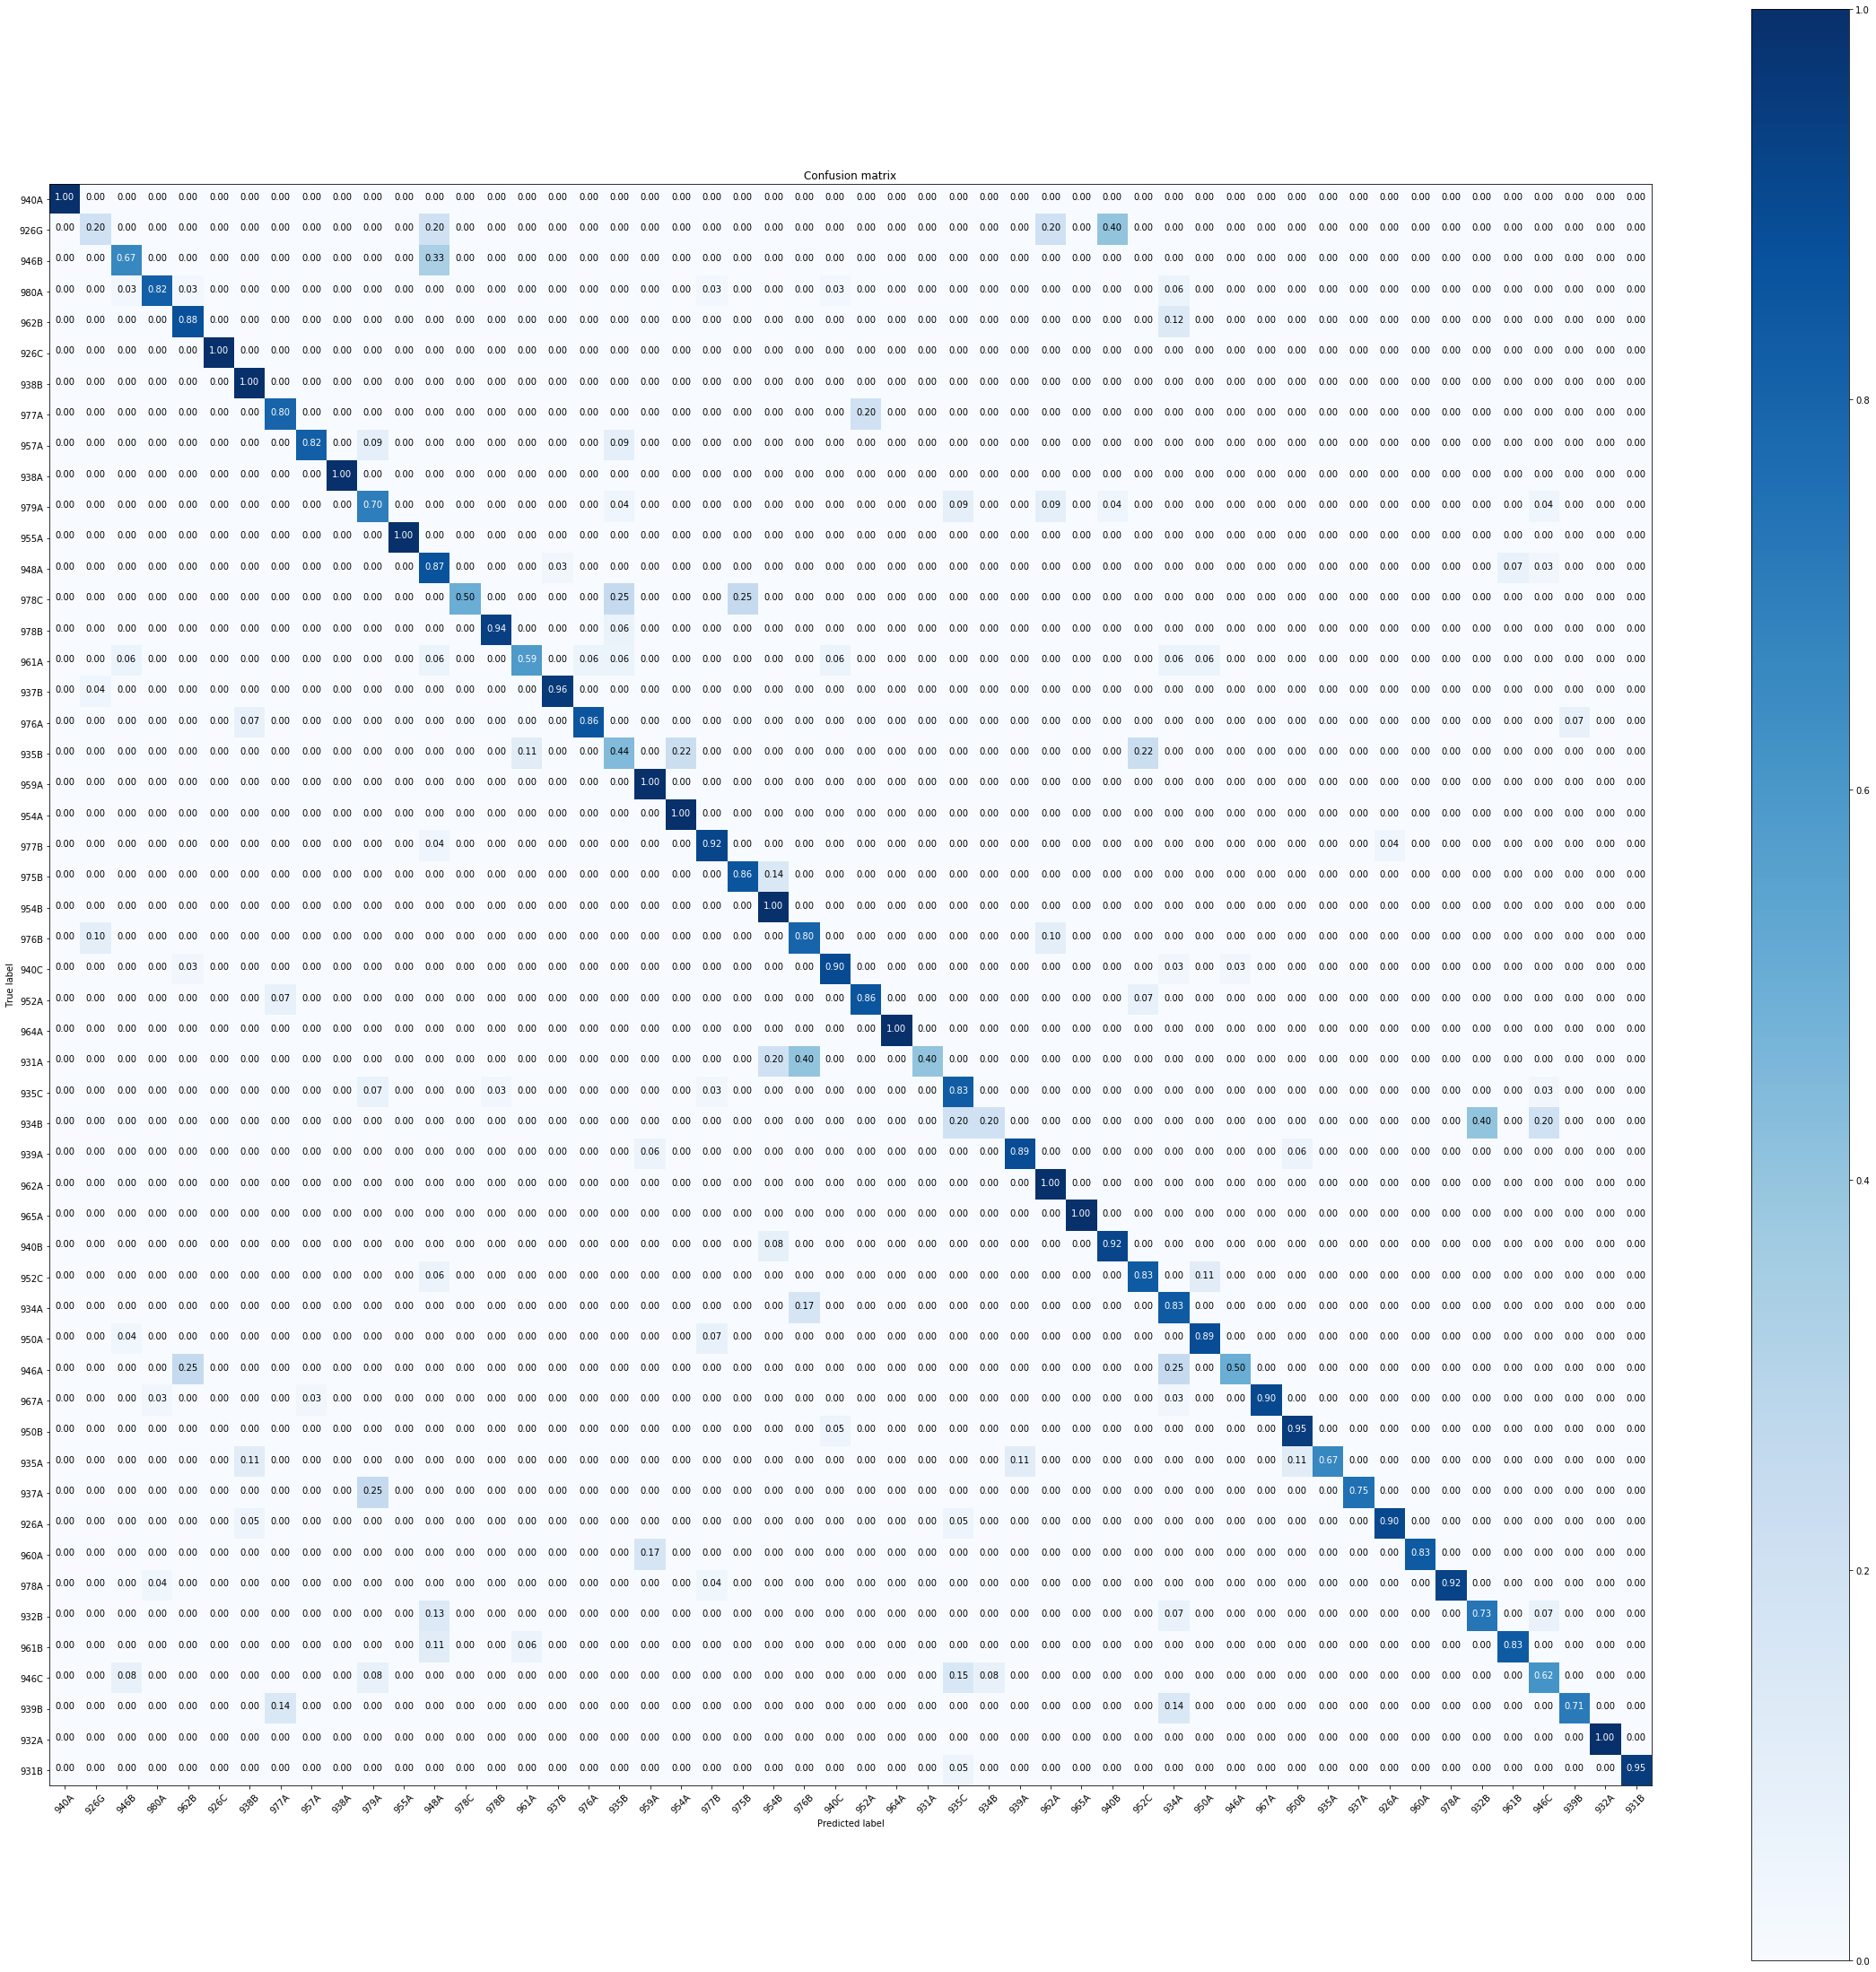

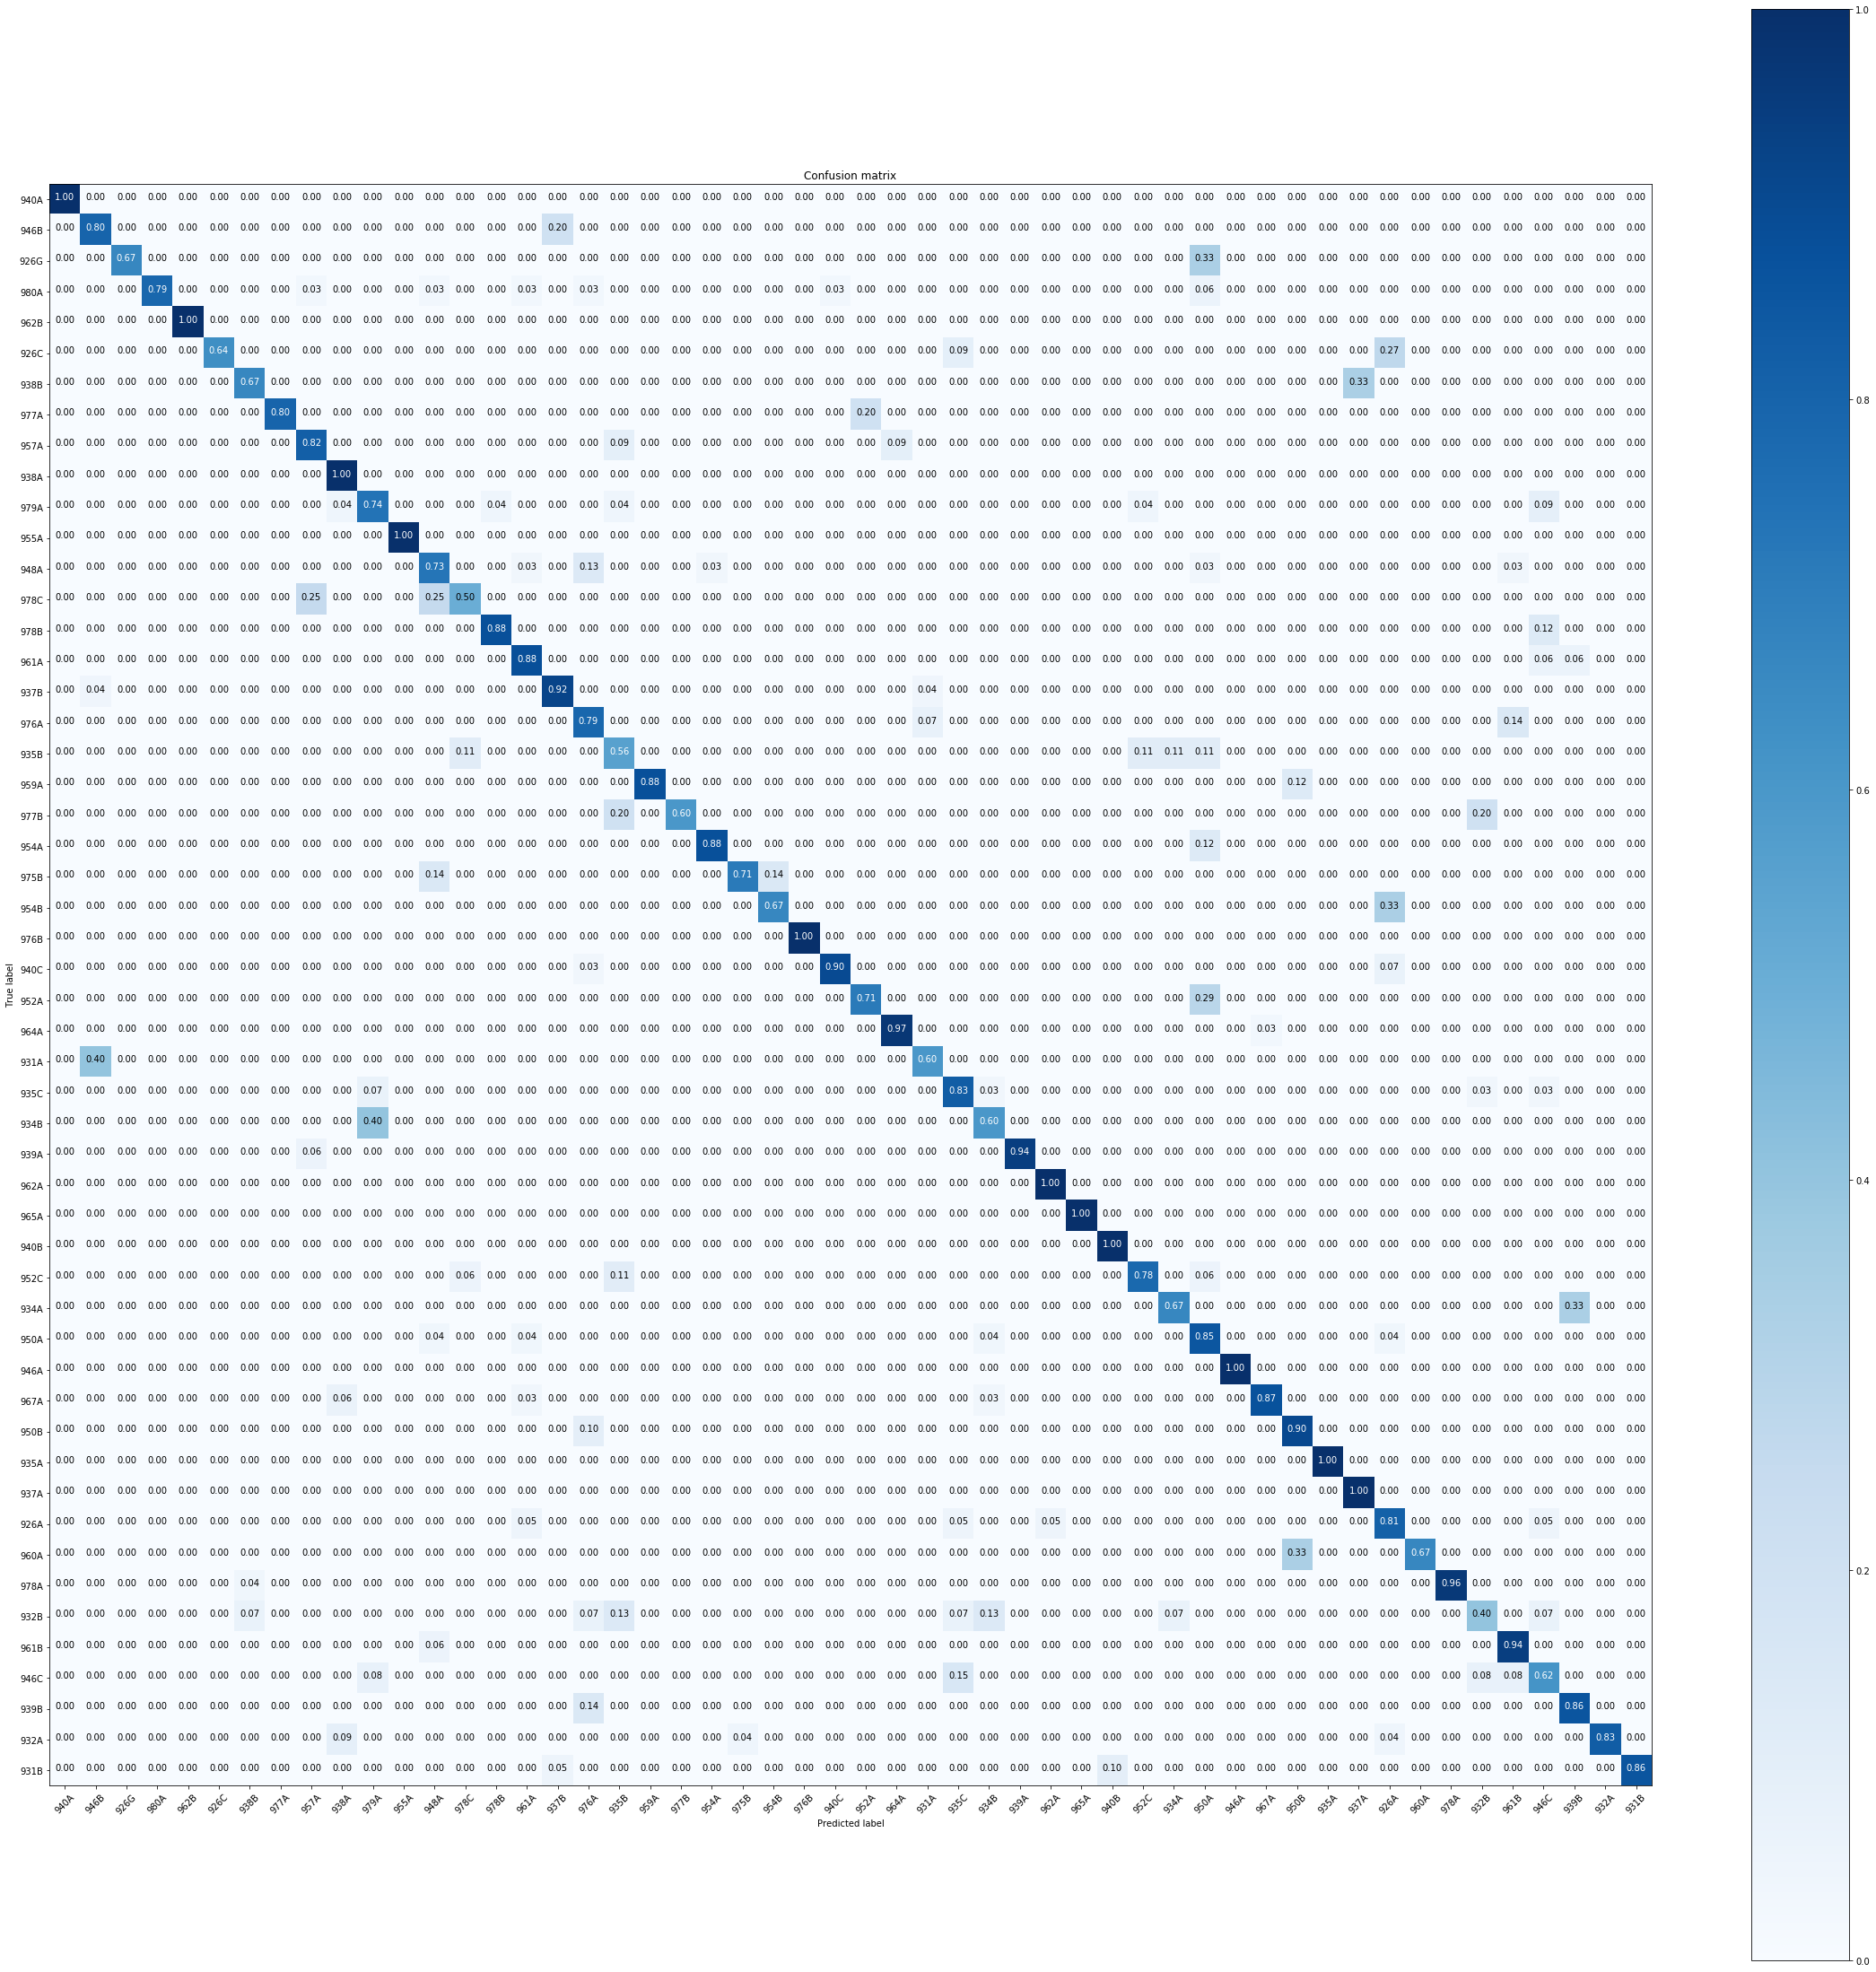

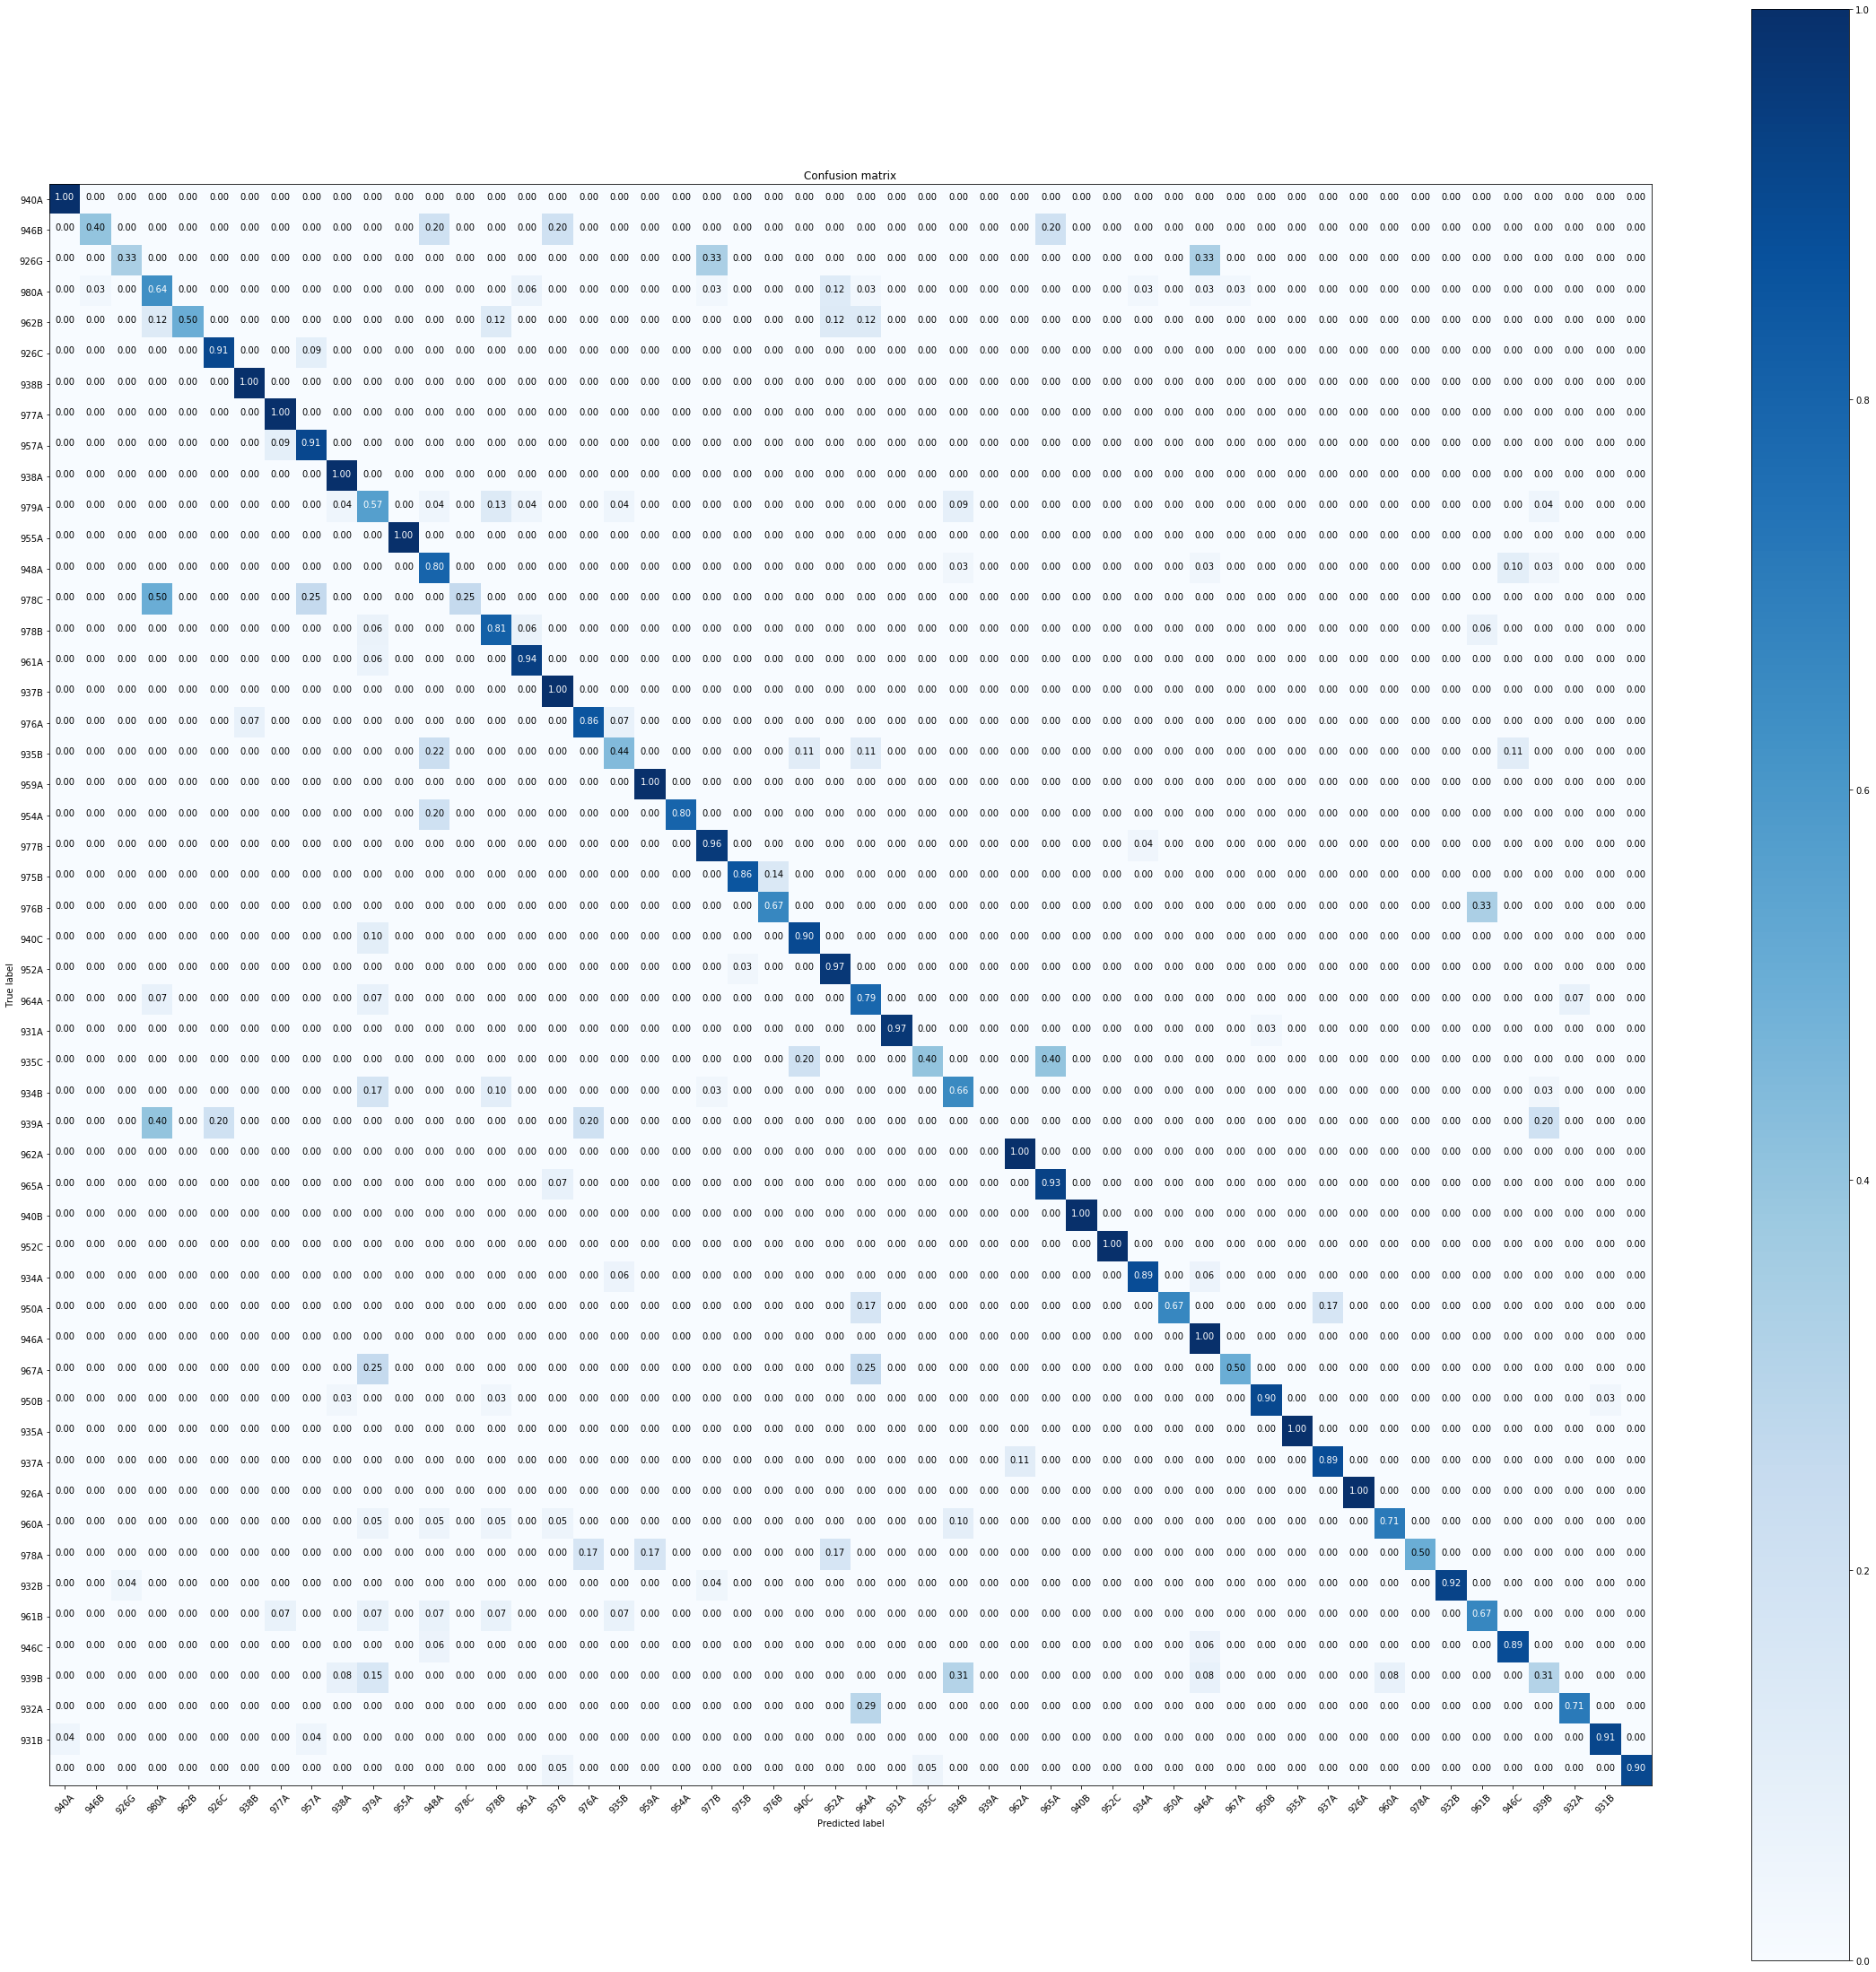

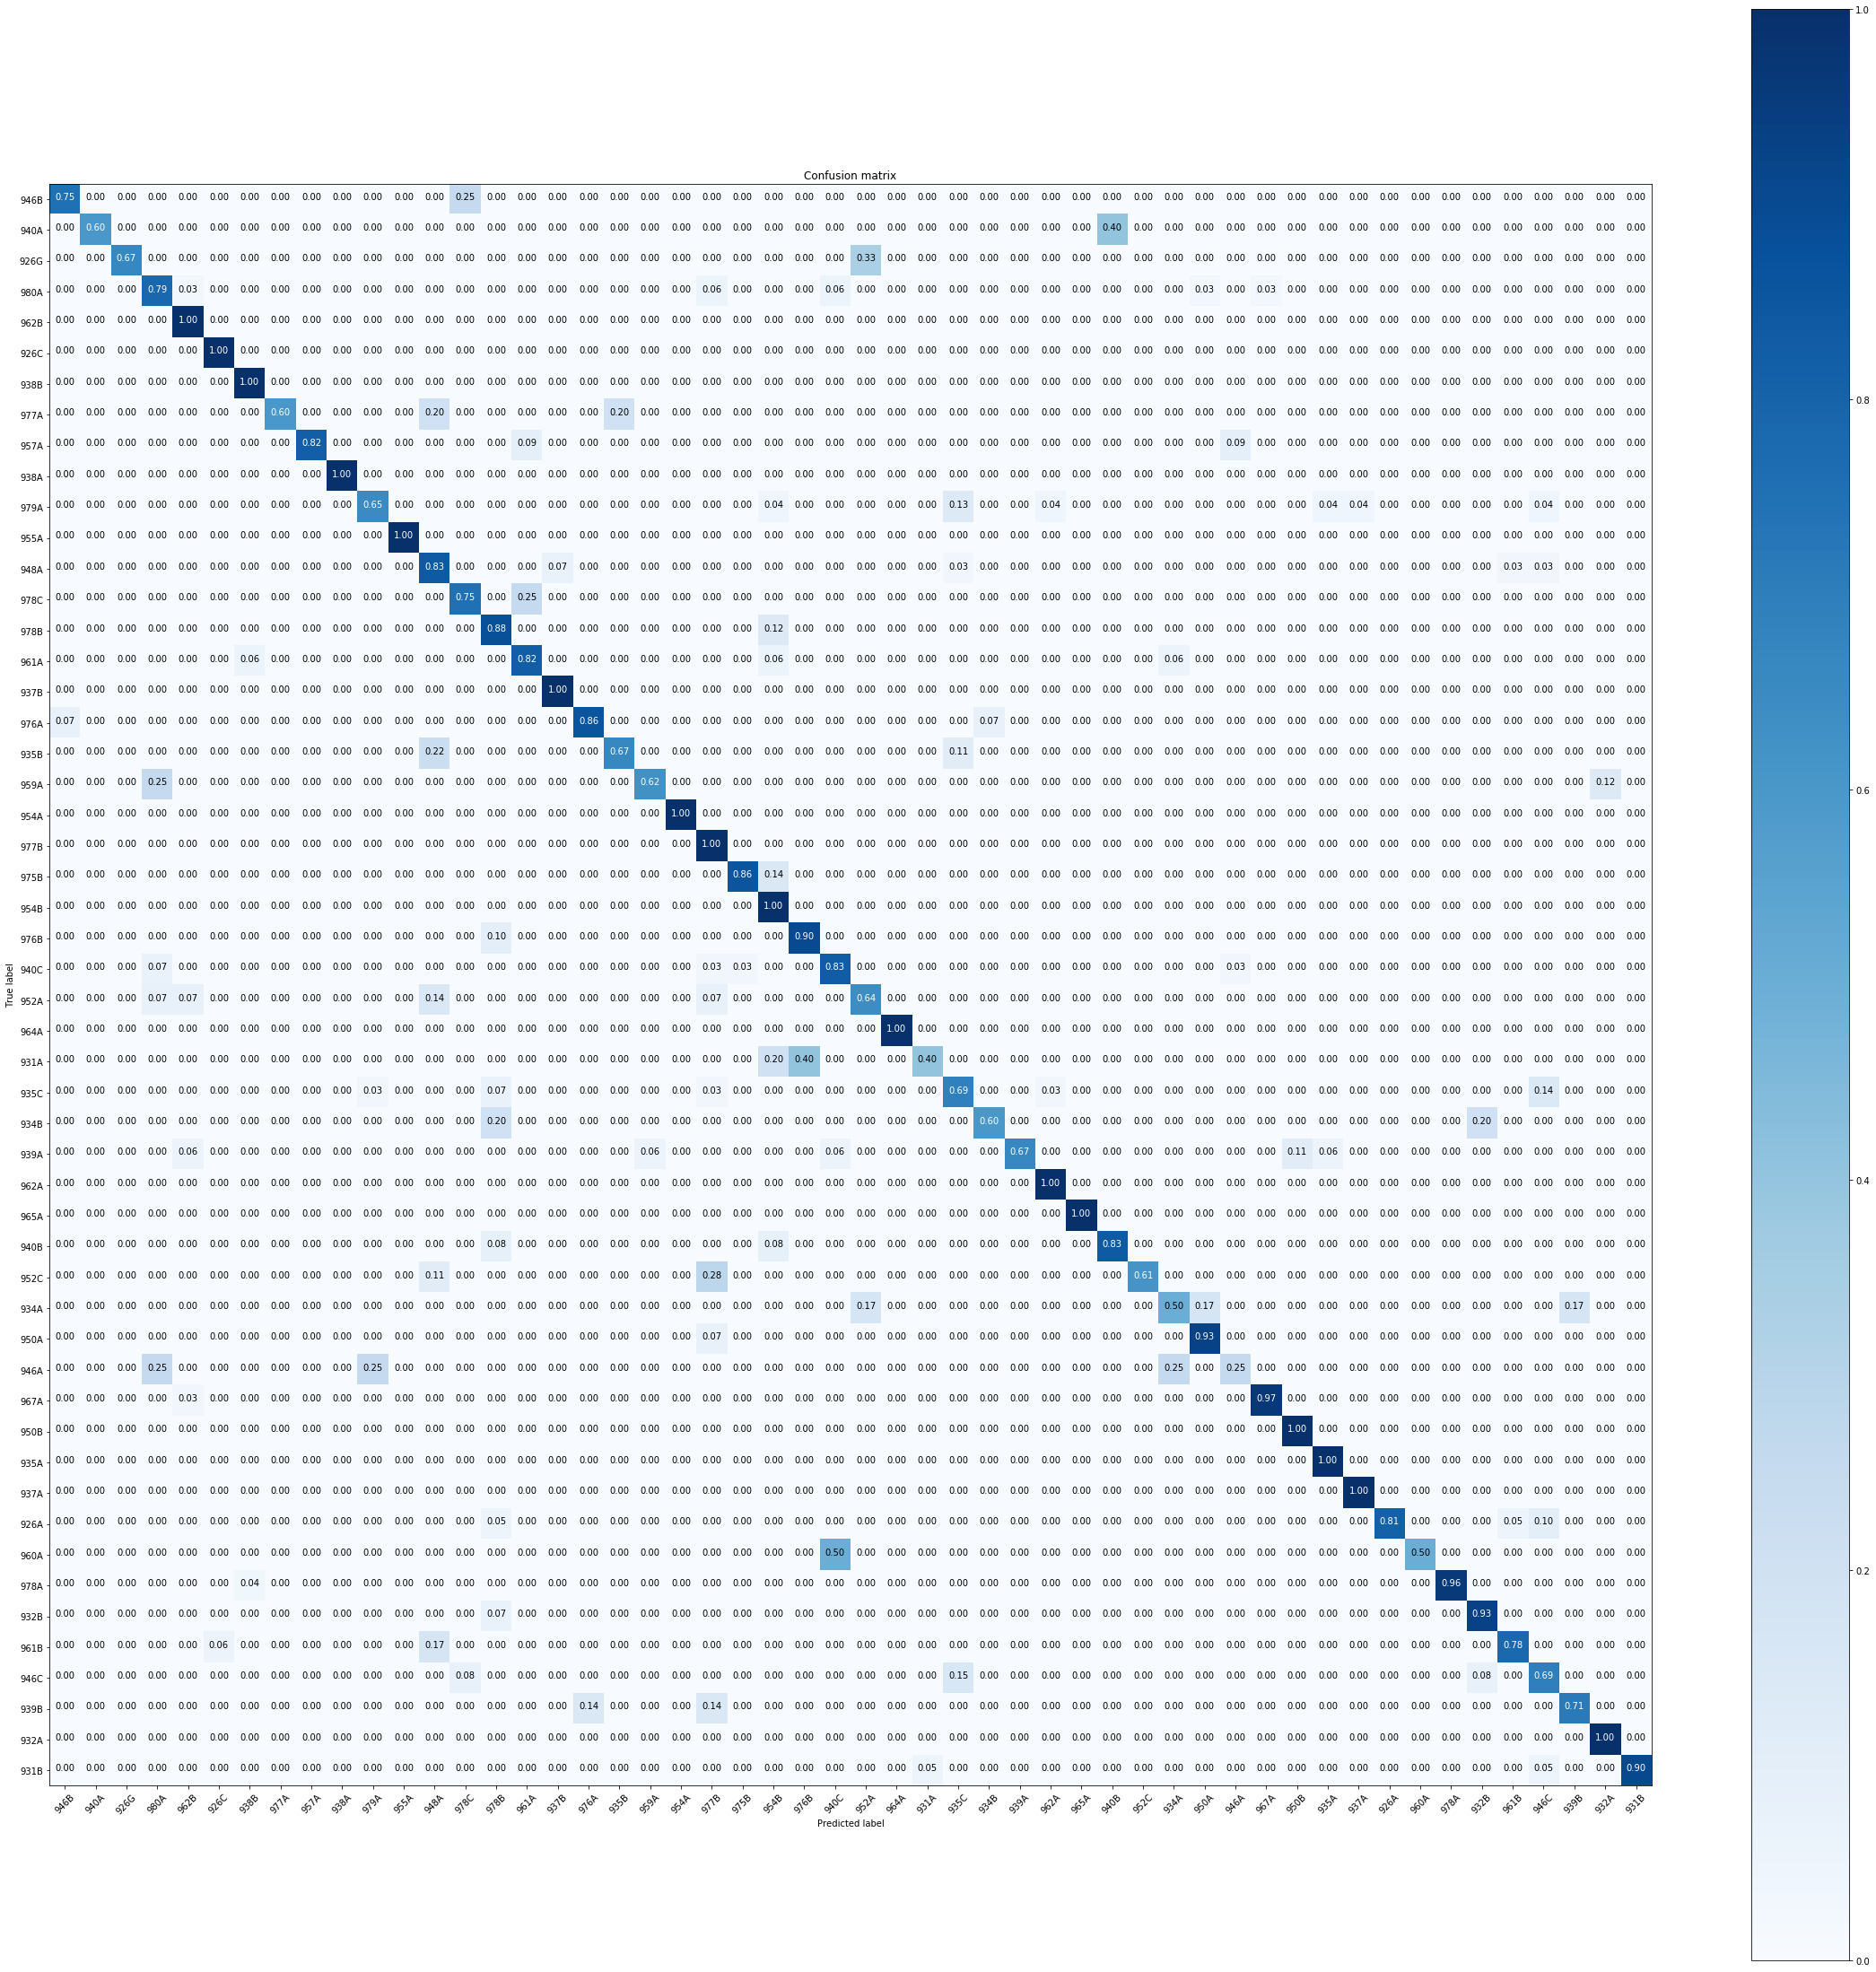

In [36]:
plot_confusion_matrix(metrics.confusion_matrix(y_validate_naive, svm_y_pred_naive),set(svm_y_pred_naive),normalize=True)
plot_confusion_matrix(metrics.confusion_matrix(y_validate_naive, dt_y_pred_naive),set(dt_y_pred_naive),normalize=True)
plot_confusion_matrix(metrics.confusion_matrix(y_validate_naive, rf_y_pred_naive),set(rf_y_pred_naive),normalize=True)
plot_confusion_matrix(metrics.confusion_matrix(y_validate_naive, nn_y_pred_naive),set(nn_y_pred_naive),normalize=True)